<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Input
Blood_Sugar_Level = ctrl.Antecedent(np.arange(0, 210, 0.1), 'Blood_Sugar_Level')
Body_Mass_Index = ctrl.Antecedent(np.arange(0, 35, 0.1), 'Body_Mass_Index')
Frequent_Urination = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'Frequent_Urination')
Fatigue_Level = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'Fatigue_Level')
#Output
Risk = ctrl.Consequent(np.arange(0, 4.1, 0.1), 'Risk')
#Dữ liệu
Blood_Sugar_Level['L'] = fuzz.trimf(Blood_Sugar_Level.universe, [0, 0, 80])
Blood_Sugar_Level['N'] = fuzz.trimf(Blood_Sugar_Level.universe, [80, 100, 120])
Blood_Sugar_Level['H'] = fuzz.trimf(Blood_Sugar_Level.universe, [120, 146, 200])
Blood_Sugar_Level['VH'] = fuzz.trimf(Blood_Sugar_Level.universe, [201, 210, 210])

Body_Mass_Index['U'] = fuzz.trimf(Body_Mass_Index.universe, [0, 0, 18.5])
Body_Mass_Index['N'] = fuzz.trimf(Body_Mass_Index.universe, [18.5, 21, 24.9])
Body_Mass_Index['O'] = fuzz.trimf(Body_Mass_Index.universe, [25, 27.6, 29.9])
Body_Mass_Index['OB'] = fuzz.trimf(Body_Mass_Index.universe, [30, 35, 35])

Frequent_Urination['R'] = fuzz.trimf(Frequent_Urination.universe, [0, 0.5, 1])
Frequent_Urination['S'] = fuzz.trimf(Frequent_Urination.universe, [1, 1.5, 2])
Frequent_Urination['O'] = fuzz.trimf(Frequent_Urination.universe, [2, 2.5, 3])

Fatigue_Level['L'] = fuzz.trimf(Fatigue_Level.universe, [0, 0.5, 1])
Fatigue_Level['M'] = fuzz.trimf(Fatigue_Level.universe, [1, 1.5, 2])
Fatigue_Level['H'] = fuzz.trimf(Fatigue_Level.universe, [2, 2.5, 3])

Risk['L'] = fuzz.trimf(Risk.universe, [0, 0.5, 1])
Risk['M'] = fuzz.trimf(Risk.universe, [1, 1.5, 2])
Risk['H'] = fuzz.trimf(Risk.universe, [2, 2.5, 3])
Risk['VH'] = fuzz.trimf(Risk.universe, [3, 3.5, 4])

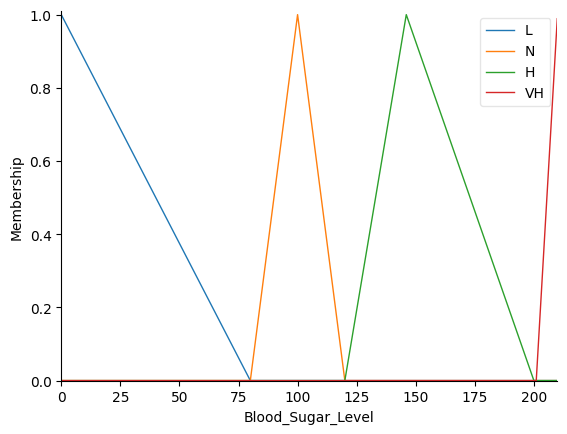

In [ ]:
Blood_Sugar_Level.view()

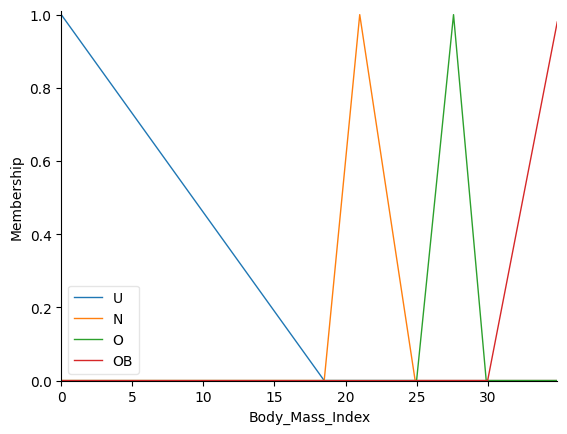

In [ ]:
Body_Mass_Index.view()

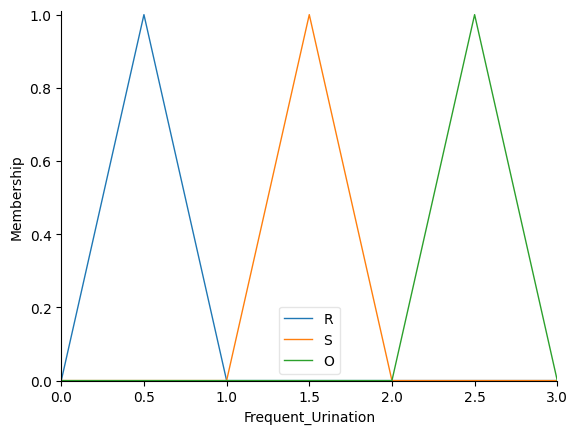

In [ ]:
Frequent_Urination.view()

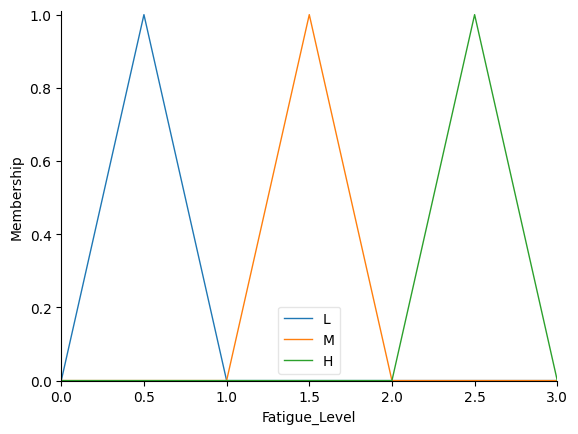

In [ ]:
Fatigue_Level.view()

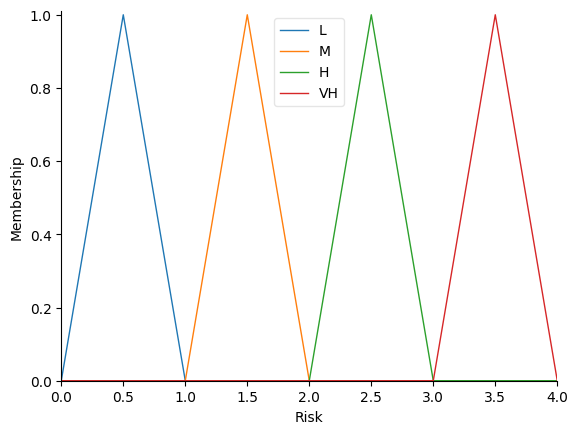

In [ ]:
Risk.view()

In [ ]:
#Luật
#Luật dựa vào lượng đường và tần suất đi tiểu
rule1=ctrl.Rule(Blood_Sugar_Level['VH']&Frequent_Urination['O'],Risk['VH'])
rule2=ctrl.Rule(Blood_Sugar_Level['VH']&Frequent_Urination['S'],Risk['H'])
rule3=ctrl.Rule(Blood_Sugar_Level['H']&Frequent_Urination['S'],Risk['H'])
rule4=ctrl.Rule(Blood_Sugar_Level['N']&Frequent_Urination['R'],Risk['L'])
#Luật dựa trên lượng đường và BMI
rule5=ctrl.Rule(Blood_Sugar_Level['VH']&Body_Mass_Index['OB'],Risk['VH'])
rule6=ctrl.Rule(Blood_Sugar_Level['VH']&Body_Mass_Index['O'],Risk['H'])
rule7=ctrl.Rule(Blood_Sugar_Level['H']&Body_Mass_Index['O'],Risk['M'])
rule8=ctrl.Rule(Blood_Sugar_Level['N']&Body_Mass_Index['N'],Risk['L'])
#Luật dựa trên lượng đường và mệt mỏi
rule9=ctrl.Rule(Blood_Sugar_Level['VH']&Fatigue_Level['H'],Risk['VH'])
rule10=ctrl.Rule(Blood_Sugar_Level['H']&Fatigue_Level['H'],Risk['H'])
rule11=ctrl.Rule(Blood_Sugar_Level['H']&Fatigue_Level['M'],Risk['M'])
rule12=ctrl.Rule(Blood_Sugar_Level['N']&Fatigue_Level['L'],Risk['L'])

Risk level: 1.5


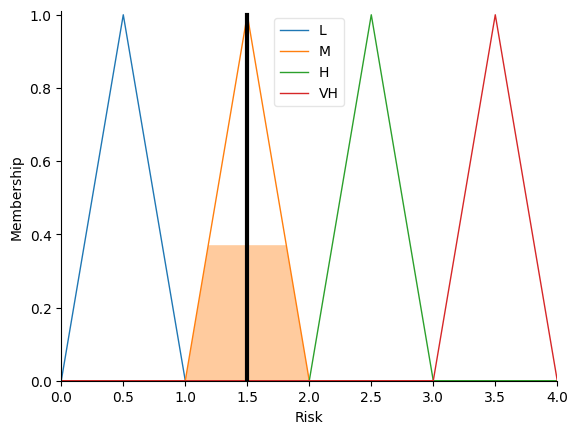

In [ ]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7,rule8,rule9,rule10,rule11,rule12])
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)
risk_sim.input['Blood_Sugar_Level'] = 180
risk_sim.input['Frequent_Urination'] = 2
risk_sim.input['Body_Mass_Index'] = 27
risk_sim.input['Fatigue_Level'] = 2
risk_sim.compute()
print(f"Risk level: {risk_sim.output['Risk']}")
Risk.view(sim=risk_sim)
